In [69]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [70]:
# Normalize between 0 and 1, then multiply by 255
def normalize_img(image):
    image = image.astype(float)
    image += 1000
    image -= np.amin(image.astype(float))
    image /= np.amax(image)
    return image * 255

In [71]:
# Load image stack
stack = io.imread('stacks/exp240202_01_E.tif')


In [72]:
# Desired size (new_width, new_height)
new_size = (512, 512)

# Pre-allocate the resized array with the new dimensions
resized_stack = np.zeros((stack.shape[0], stack.shape[1], new_size[1], new_size[0]), dtype=stack.dtype)

# Iterate over each timepoint and each slice
for t in range(stack.shape[0]):  # Loop over timepoints
    for z in range(stack.shape[1]):  # Loop over slices
        # Resize slice and store it in the new array
        resized_stack[t, z] = cv2.resize(stack[t, z], new_size, interpolation=cv2.INTER_LINEAR)


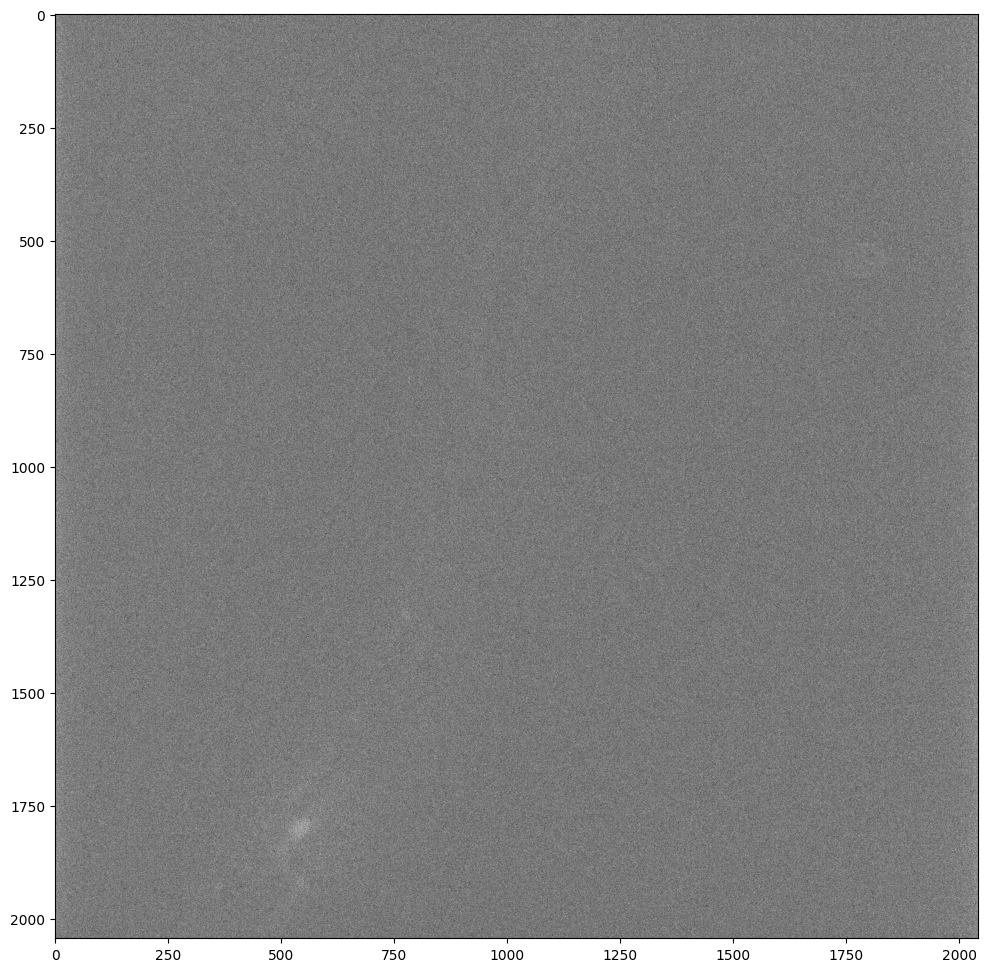

In [73]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(stack[0,1,:,:], cmap='gray')

In [74]:
# Set threshold between 0-255
threshold = 1
# List to store slices
timepoint_stack = []
image_stack = []

for ii in range(stack.shape[0]):
    for kk in range(stack.shape[1]):
        # Apply median blur to target image
        mask = cv2.medianBlur(stack[ii,kk,:,:], ksize=5)  # ksize is the kernel size, must be an odd number

        # Normalize mask and target between 0-255
        mask = normalize_img(mask)
        target = normalize_img(stack[ii,kk,:,:])

        # Binarize mask
        blank = np.zeros_like(mask)
        binary_mask = np.where(mask < threshold, blank, 1)

        # Mask target slice
        processed_slice = target * binary_mask

        # Add processed slice to stack
        image_stack.append(processed_slice)

    # Add processed stack to timepoint stack    
    timepoint_stack.append(image_stack)
    # Reset image stack for next timepoint
    image_stack = []

# Convert to numpy array
image_stack = np.stack(timepoint_stack, axis=0)

In [75]:
np.amax(image_stack)

255.0

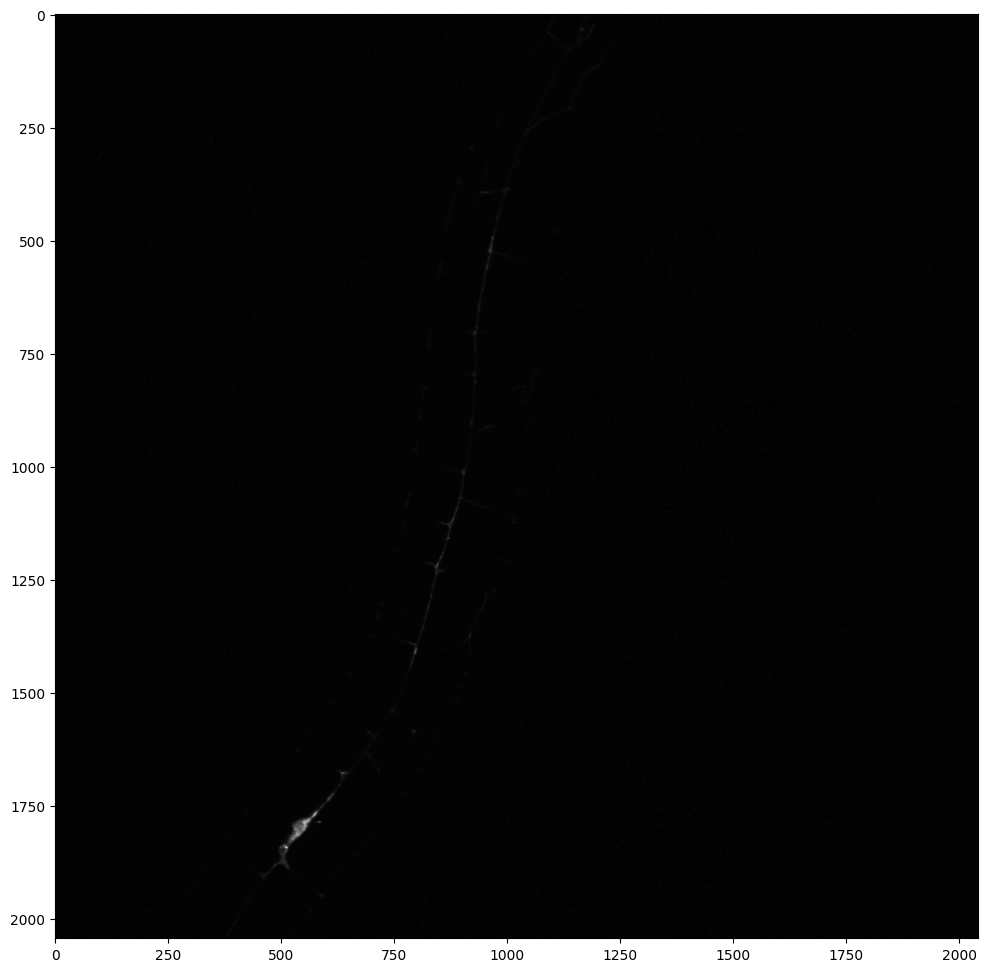

In [79]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image_stack[0,32,:,:], cmap='gray')